In [1]:
from pmlb import fetch_data, nearest_datasets
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
%matplotlib inline

/home/bill/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pmlb_stats= pd.read_csv('../pmlb/all_summary_stats.tsv', sep='\t')
print('potential dimensions:',[c for c in pmlb_stats.columns if c != 'dataset'])
pmlb_stats = pmlb_stats.apply(lambda x: pd.to_numeric(x,errors='coerce')).dropna(axis=1,how='all')

pmlb_stats

potential dimensions: ['n_instances', 'n_features', 'n_binary_features', 'n_categorical_features', 'n_continuous_features', 'endpoint_type', 'n_classes', 'imbalance', 'task']


,n_instances,n_features,n_binary_features,n_categorical_features,n_continuous_features,n_classes,imbalance
0,488,4,0,0,4,9.0,0.099363
1,1000,10,0,0,10,4.0,0.108291
2,1000,4,0,0,4,5.0,0.111245
3,1000,4,0,0,4,9.0,0.031251
4,47,13,0,0,13,42.0,0.002970
...,...,...,...,...,...,...,...
279,1599,11,0,0,11,6.0,0.228804
280,4898,11,0,0,11,7.0,0.211974
281,178,13,0,2,11,3.0,0.012530
282,973,9,9,0,0,2.0,0.114332


In [10]:
dataset = 'appendicitis'
dimensions = ['n_instances','n_features'] # these are the default dimensions
df = fetch_data(dataset)
closest_names = nearest_datasets(df, n = 20, dimensions=dimensions, task='classification')

print('closest names:',closest_names)

generating summary stats for dataset
closest names: ['appendicitis' 'cloud' 'prnn_crabs' 'cleveland_nominal' 'ecoli'
 'penguins' 'analcatdata_creditscore' 'postoperative_patient_data' 'mux6'
 'corral' 'analcatdata_bankruptcy' 'biomed' 'cars' 'monk3' 'monk1' 'monk2'
 'pima' 'diabetes' 'yeast' 'tae']


106 8


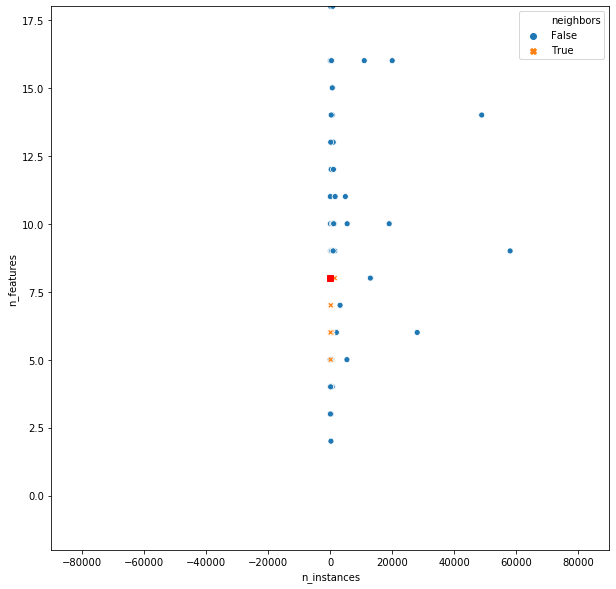

In [11]:
pmlb_stats= pd.read_csv('../pmlb/all_summary_stats.tsv',sep='\t')
pmlb_stats = pmlb_stats.loc[pmlb_stats.task == 'classification']
pmlb_stats['neighbors'] = pmlb_stats['dataset'].isin(closest_names)
plt.figure(figsize=(10,10))
sns.scatterplot(data = pmlb_stats,
               x = 'n_instances',
               y = 'n_features',
               style='neighbors',
               hue='neighbors')
x0 = df.shape[0]
y0 = df.shape[1]
print(x0,y0)
x_offset=pmlb_stats['n_instances'].std()
y_offset0=pmlb_stats['n_features'].std()
plt.plot(x0,y0,'rs')
# plt.text(x0,y0,dataset)
plt.xlim(x0-x_offset,x0+x_offset)
plt.ylim(y0-y_offset,y0+y_offset)
# plt.xscale('log')
# plt.yscale('log')
plt.show()